In [1]:
import numpy as np
import sys, os
sys.path.append(os.path.abspath(os.path.join('..')))
from pyabc import BOLFI, Prior
import emcee
import scipy.stats as ss
import matplotlib.pyplot as plt
from pyabc.acquisition import MaxPosteriorVariance
import GPyOpt
from pyabc.prior import PriorList, Prior
import numpy as np

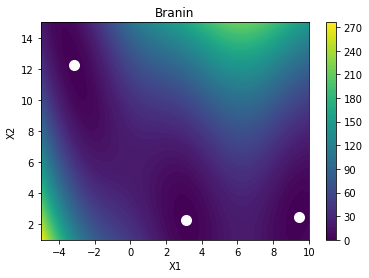

In [2]:
# --- Function to optimize
func = GPyOpt.objective_examples.experiments2d.branin()
func.plot()

In [3]:
objective = GPyOpt.core.task.SingleObjective(func.f)

prior = Prior('uniform', 0, 5)

priors = PriorList([prior, prior])

In [4]:
model = GPyOpt.models.GPModel(optimize_restarts=5, verbose=False)

space = GPyOpt.Design_space(space =[{'name': 'var_1', 'type': 'continuous', 'domain': (-5,10)},
                                    {'name': 'var_2', 'type': 'continuous', 'domain': (1,15)}])

acquisition = MaxPosteriorVariance(model, space, priors)


initial_design = GPyOpt.experiment_design.initial_design('random', space, 5)

evaluator = GPyOpt.core.evaluators.Sequential(acquisition)

In [5]:
bo = GPyOpt.methods.ModularBayesianOptimization(model, space, objective, acquisition, evaluator, initial_design)

max_iter  = 10
bo.run_optimization(max_iter = max_iter)

[[ -5.78523582e-01   2.22352517e+00]
 [  6.70219571e+00   2.41476238e+00]
 [  3.98636850e-03   1.37799618e+01]
 ..., 
 [  1.89744009e+00   1.12002063e+00]
 [  5.25479993e+00   7.83712896e+00]
 [  1.77563134e+00   1.41098980e+01]]
[[-0.57852358  2.22352517]]


IndexError: index 1 is out of bounds for axis 0 with size 1

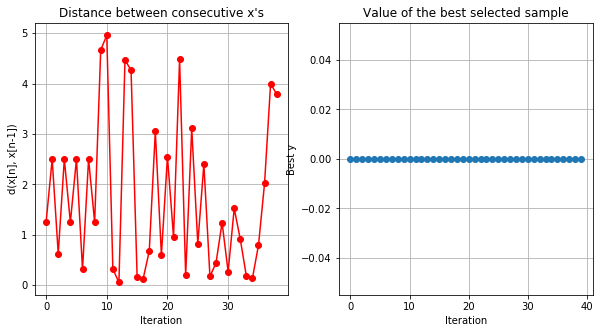

In [4]:
bolfi.bolfi.plot_convergence()

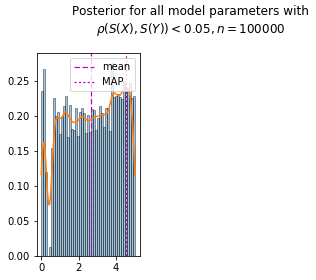

In [5]:
plot_marginals(bolfi, normed=True)